
# Lung Cancer Prediction using Logistic Regression

For this analysis we will be working with the Lung Cancer Dataset. 

I'll be trying to predict a classification- Wether a patient has cancer or not through my understanding of implementing Logistic Regression in Python for classification.

The accuracy of the cancer prediction system enables people to learn about their cancer risk at a minimal cost, and it also enables them to make the best decisions possible depending on their cancer risk status.

## Import Libraries
Let's import some libraries to get started!

In [111]:
import numpy as np
import pandas as pd

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the Lung cancer.csv file into a pandas dataframe.

In [113]:
cancer =pd.read_csv('Lung cancer.csv')

In [114]:
cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [115]:
cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [116]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Performing some EDA

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

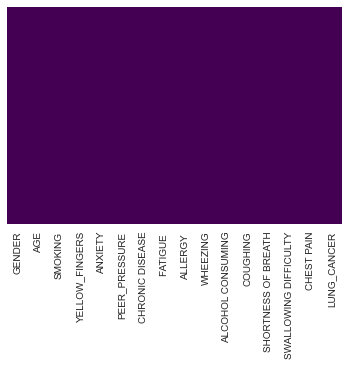

In [117]:
sns.heatmap(cancer.isnull(), yticklabels=False,cbar=False,cmap='viridis')

looking at the above heatmap we can see clearly that we have no missing data

Let's continue on by visualizing some more of the data!

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

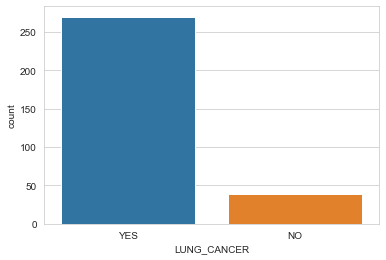

In [118]:
sns.set_style('whitegrid')
sns.countplot(x='LUNG_CANCER',data=cancer)

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

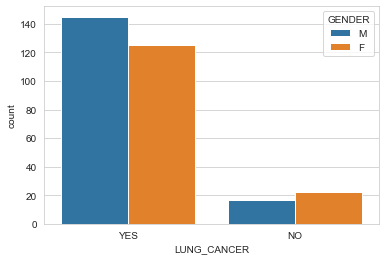

In [125]:
sns.countplot(x='LUNG_CANCER',hue='GENDER',data=cancer)

<Figure size 504x864 with 0 Axes>

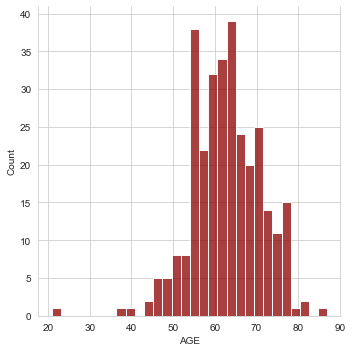

In [121]:
plt.figure(figsize=(7, 12))
sns.displot(cancer['AGE'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='SMOKING', ylabel='count'>

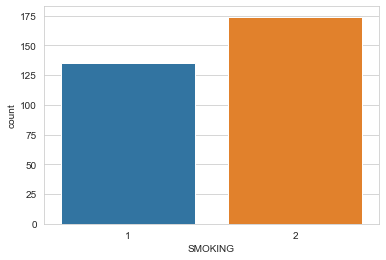

In [106]:
sns.countplot(x='SMOKING',data=cancer)

<AxesSubplot:>

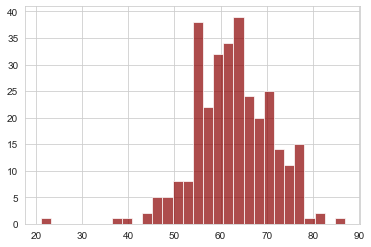

In [95]:
cancer['AGE'].hist(bins=30,color='darkred',alpha=0.7)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [37]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [43]:
 GENDER =pd.get_dummies(cancer['GENDER'],drop_first=True)

In [45]:
 LUNG_CANCER =pd.get_dummies(cancer['LUNG_CANCER'],drop_first=True)

In [47]:
cancer = pd.concat([cancer,GENDER,LUNG_CANCER], axis=1)

In [50]:
cancer.drop(['GENDER','LUNG_CANCER'],axis=1,inplace=True)

In [51]:
cancer.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,M,YES
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


In [53]:
cancer2 = cancer.rename(columns = {'M':'GENDER', 'YES':'LUNG_CANCER'}, inplace=False)

In [54]:
cancer2.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set 

## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [122]:
X = cancer2.drop('LUNG_CANCER' , axis=1)
y = cancer2['LUNG_CANCER']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.30,random_state=101)

## Training and Predicting

In [72]:
from sklearn.linear_model import LogisticRegression

In [86]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [74]:
predictions = logmodel.predict(X_test)

#### Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

We can also check the confusion_matrix 

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [124]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 8  7]
 [ 1 77]]


              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.92      0.99      0.95        78

    accuracy                           0.91        93
   macro avg       0.90      0.76      0.81        93
weighted avg       0.91      0.91      0.90        93

